# Toxic Waste 

This notebook reflects an exploration into several mining data sources: 
1. Environmental Accidents - Utah Interactive Map
    - Unsure what the range of time is:
2. Toxic_Release_Inventory
    - EPA Data from 1987-2019

In [1]:
#Libraries: 
#Basic py: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import os

pd.options.display.max_columns = 50

## Environmental Accident Data Exploration

In [2]:
path = './Toxic_Waste/'
#Look at accident data first: 
Env_Acci_df = pd.read_excel(path + 'DEQ_Haz_Spills.xlsx')
Env_Acci_df.head()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [4]:
print("Total Data Entries: " + str(Env_Acci_df.shape[0]))
print("Total Columns: " + str(Env_Acci_df.shape[1]))

Total Data Entries: 4398
Total Columns: 22


In [5]:
#What information do we have:
list(Env_Acci_df)

['OBJECTID',
 'Shape',
 'DERRID',
 'SITEDESC',
 'Northing',
 'Easting',
 'Title_EventName',
 'Address_Location',
 'Nearest_City',
 'Date_Discovered',
 'Responsible_Party',
 'County',
 'Map_Label',
 'Incident_summary',
 'Date_Discovered_For_Filter',
 'ID',
 'NAME',
 'ADDRESS',
 'CITY',
 'TYPE',
 'ENVIROAPPLABEL',
 'ENVIROAPPSYMBOL']

In [10]:
#Let's look at the total number of missing values:
Env_Acci_df.isna().sum().sort_values()

OBJECTID                         0
Shape                            0
DERRID                           0
SITEDESC                         0
Northing                         0
Easting                          0
TYPE                             0
ENVIROAPPLABEL                   0
Map_Label                        0
ID                               0
Nearest_City                     1
CITY                             1
County                           2
Incident_summary                16
Title_EventName                 27
NAME                            27
Responsible_Party              197
Date_Discovered                206
Date_Discovered_For_Filter     206
ADDRESS                        387
Address_Location               387
ENVIROAPPSYMBOL               4398
dtype: int64

Conclusions: 
1. Lots of missing addresses. BUT have complete northing and easting. 
2. Inicident summaries are missing for 16 of the total

In [7]:
Env_Acci_df.loc[:,'County'].value_counts()

SALT LAKE            968
Salt Lake            592
DUCHESNE             293
UTAH                 273
DAVIS                244
Davis                236
WEBER                190
UINTAH               171
Utah                 136
TOOELE                97
Weber                 96
BOX ELDER             94
CACHE                 84
SUMMIT                73
WASHINGTON            71
SAN JUAN              59
CARBON                58
Washington            43
WASATCH               42
GRAND                 42
IRON                  41
BEAVER                33
EMERY                 31
Cache                 30
Summit                26
Tooele                25
Uintah                25
MORGAN                24
SEVIER                24
MILLARD               22
KANE                  20
Box Elder             20
JUAB                  19
Iron                  17
Grand                 14
Millard               14
SANPETE               13
Wasatch               13
Morgan                12
Sevier                12


Conclusions: 
1. Greatest number of measurements are made for the Salt Lake Area. There appears to be some reduncancy in the nomencalture. 

In [8]:
#Let's look at an example summary to see what is said: 
Env_Acci_df.loc[3,'Incident_summary']

'Tractor trailer was transporting several hazardous materials in 55-gallon drums.  Product was discovered leaking from trailer.  I-80 was closed and HazMat teams responded.  Took some time to figure exactly which drum was leaking.  A non-corrosive polyamine had leaked.  Believe that all spilled material was contained on asphalt.  TW company cleaned up spilled product.  Information was supplied by Ernie Maki, Jeff Coombs (Tooele County), and evening news.  I-80 eastbound was closed from milemarkers 84 to 99.'

Exact chemical compounds will be hard to extract from this data. Will require more digging per each incident which may or may not yield chemical information. 

## Visualization 

In [12]:
#Histogram: What is the trend in environmental accidents? 
#Going to bin by year
time_slice = pd.DataFrame(columns = ["Date"])
time_slice['Date'] = Env_Acci_df.loc[:,'Date_Discovered']
time_slice['Date'] = pd.to_datetime(time_slice['Date'])
time_slice = time_slice.dropna() #Drops ~200 which have na...Makes sense based upon earlier estimates.
time_slice['year'] = pd.DatetimeIndex(time_slice['Date']).year

Text(0, 0.5, 'Spills')

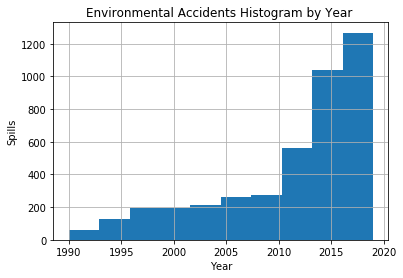

In [13]:
time_slice.hist()
plt.title('Environmental Accidents Histogram by Year ')
plt.xlabel('Year')
plt.ylabel("Spills")
#plt.savefig("Env_Acc_Hist.png")

## Toxic Release Inventory: 
EPA's method to track the release of toxic chemicals from specific manufacturers

In [17]:
path = './Toxic_Waste/Toxic_Release_Inventory/'
TRI_df = []

#Store Data: 
for files in os.listdir(path):
    if (files.split('.')[1] == 'csv'):
        TRI_df.append(pd.read_csv(path + files, sep=",") )

TRI_df = pd.concat(TRI_df)

In [18]:
#Summary Stats
print("The total number of observations of the concatenated data is: "+ str(TRI_df.shape[0]))
print("The total number of columns is:  "+ str(TRI_df.shape[1]))
print("The earliest year is: " + str(min(TRI_df['1. YEAR'])))
print("The earliest year is: " + str(max(TRI_df['1. YEAR'])))
print("The mean number of observations per year per chemical is: " + str(TRI_df['1. YEAR'].value_counts().mean()))

The total number of observations of the concatenated data is: 23523
The total number of columns is:  114
The earliest year is: 1987
The earliest year is: 2018
The mean number of observations per year per chemical is: 735.09375


In [19]:
#What are the columns and sparsity of rows in the data? 
test = TRI_df.isna().sum().sort_values()
print(test.to_string())

1. YEAR                               0
80. 6.2 - M26                         0
79. 6.2 - M24                         0
78. 6.2 - M20                         0
77. OFF-SITE RELEASE TOTAL            0
76. 6.2 - M99                         0
75. 6.2 - M94                         0
74. 6.2 - M90                         0
73. 6.2 - M79                         0
72. 6.2 - M73                         0
71. 6.2 - M65                         0
70. 6.2 - M64                         0
69. 6.2 - M67                         0
68. 6.2 - M66                         0
67. 6.2 - M63                         0
66. 6.2 - M72                         0
65. 6.2 - M82                         0
64. 6.2 - M81                         0
63. 6.2 - M71                         0
62. 6.2 - M61 METAL                   0
61. 6.2 - M40 METAL                   0
60. 6.2 - M62                         0
59. 6.2 - M41                         0
58. 6.2 - M10                         0
81. 6.2 - M28                         0


In [20]:
#Data That I want to look at: 
#30. CHEMICAL
#37. CARCINOGEN
#9. ZIP
#12. LATITUDE
#13. LONGITUDE
#4. FACILITY NAME
#96. TOTAL RELEASES 
#1. YEAR

sel_tri= TRI_df[["1. YEAR","96. TOTAL RELEASES","4. FACILITY NAME",
                 "13. LONGITUDE","12. LATITUDE","9. ZIP","37. CARCINOGEN","30. CHEMICAL",]]

sel_tri.head()

,1. YEAR,96. TOTAL RELEASES,4. FACILITY NAME,13. LONGITUDE,12. LATITUDE,9. ZIP,37. CARCINOGEN,30. CHEMICAL
0,2001,2.43,ASAHI REFINING USA INC,-112.000810,40.725570,84120,YES,LEAD
1,2001,15092.00,UTILITY TRAILER MANUFACTURING,-112.034109,41.115500,84015,NO,"1,1-DICHLORO-1-FLUOROETHANE"
2,2001,1620.00,HEXCEL CORP,-112.054074,40.653604,84119,YES,DICHLOROMETHANE
3,2001,120.00,GENEVA STEEL LLC,-111.734076,40.297058,84058,NO,"BENZO(G,H,I)PERYLENE"
4,2001,0.00,BLACK OIL CO MONTICELLO BULK PLANT,-109.342880,37.872920,84535,YES,BENZENE


What is the unit of the total release? 

Text(0, 0.5, 'Releases')

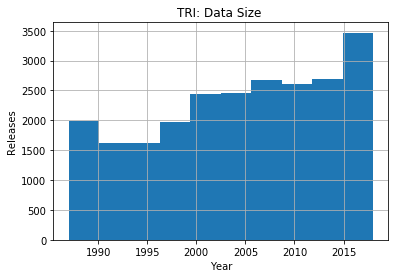

In [21]:
#Visualize the data:
sel_tri["1. YEAR"].hist()
plt.title('TRI: Data Size ')
plt.xlabel('Year')
plt.ylabel("Releases")
#plt.savefig("TRI_Year_Hist.png")

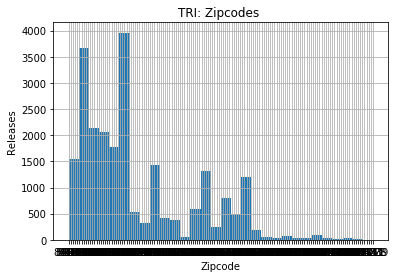

In [22]:
test = pd.DataFrame()
test['t'] = sel_tri.loc[:,"9. ZIP"].astype(str).str[:6]
test['t'].hist(bins = 30)

plt.title('TRI: Zipcodes ')
plt.xlabel('Zipcode')
plt.ylabel("Releases")
plt.savefig("TRI_Zips_Hist.png")

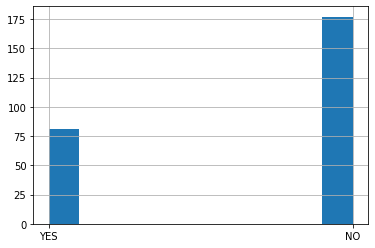

In [23]:
unique_subset = sel_tri.drop_duplicates(subset = "30. CHEMICAL")
unique_subset["37. CARCINOGEN"].hist()

In [24]:
#What are the declared carcinogens within the data? 
list(unique_subset["30. CHEMICAL"][unique_subset["37. CARCINOGEN"] == "YES"])

['LEAD',
 'DICHLOROMETHANE',
 'BENZENE',
 'POLYCYCLIC AROMATIC COMPOUNDS',
 'THIOUREA',
 'DIOXIN AND DIOXIN-LIKE COMPOUNDS',
 'STYRENE',
 '1,2-DIBROMOETHANE',
 'CUMENE',
 'ETHYLBENZENE',
 'ASBESTOS (FRIABLE)',
 'METHYL ISOBUTYL KETONE',
 'NAPHTHALENE',
 'NICKEL',
 'BERYLLIUM COMPOUNDS',
 'COBALT',
 'CADMIUM COMPOUNDS',
 'HEXACHLOROBENZENE',
 'NICKEL COMPOUNDS',
 '1,3-BUTADIENE',
 'DI(2-ETHYLHEXYL) PHTHALATE',
 'TRICHLOROETHYLENE',
 'ETHYLENE OXIDE',
 'FORMALDEHYDE',
 'TETRACHLOROETHYLENE',
 'POLYCHLORINATED BIPHENYLS',
 'HYDRAZINE',
 'ETHYL ACRYLATE',
 'CHLORDANE',
 '1,2-DICHLOROETHANE',
 'ACETALDEHYDE',
 'HEPTACHLOR',
 'EPICHLOROHYDRIN',
 '2,4-DINITROTOLUENE',
 'CHLOROFORM',
 'VINYL CHLORIDE',
 '1,1,1,2-TETRACHLOROETHANE',
 'NITROBENZENE',
 'CARBON TETRACHLORIDE',
 'TOXAPHENE',
 'CREOSOTE',
 '1,4-DICHLOROBENZENE',
 'ISOPRENE',
 'ARSENIC',
 'MALATHION',
 'CHLOROPHENOLS',
 'URETHANE',
 'DIAZINON',
 '2,4-D',
 'ACRYLONITRILE',
 'CADMIUM',
 '1,1,2,2-TETRACHLOROETHANE',
 'ACRYLAMIDE',
 'VIN

In [25]:
#Which chemicals have the most observations? 
a = sel_tri["30. CHEMICAL"].value_counts()
list(a.keys())

['LEAD COMPOUNDS',
 'NITRIC ACID',
 'LEAD',
 'AMMONIA',
 'XYLENE (MIXED ISOMERS)',
 'NITRATE COMPOUNDS',
 'ZINC COMPOUNDS',
 'TOLUENE',
 'MANGANESE',
 'NICKEL',
 'HYDROCHLORIC ACID (1995 AND AFTER ACID AEROSOLS" ONLY)"',
 'SULFURIC ACID (1994 AND AFTER ACID AEROSOLS" ONLY)"',
 'CHROMIUM',
 'MANGANESE COMPOUNDS',
 'COPPER COMPOUNDS',
 'COPPER',
 'MERCURY COMPOUNDS',
 'METHANOL',
 'CHROMIUM COMPOUNDS(EXCEPT CHROMITE ORE MINED IN THE TRANSVAAL REGION)',
 'POLYCYCLIC AROMATIC COMPOUNDS',
 'ETHYLBENZENE',
 'HYDROGEN FLUORIDE',
 'ETHYLENE GLYCOL',
 'N-HEXANE',
 '1,2,4-TRIMETHYLBENZENE',
 'BENZENE',
 'NAPHTHALENE',
 'DIOXIN AND DIOXIN-LIKE COMPOUNDS',
 'NICKEL COMPOUNDS',
 'CHLORINE',
 'BARIUM COMPOUNDS',
 'DIISOCYANATES',
 'CERTAIN GLYCOL ETHERS',
 'STYRENE',
 'CYCLOHEXANE',
 'BENZO(G,H,I)PERYLENE',
 'PHOSPHORIC ACID',
 '1,1,1-TRICHLOROETHANE',
 'METHYL ETHYL KETONE',
 'PROPYLENE',
 'ALUMINUM (FUME OR DUST)',
 'MERCURY',
 'ETHYLENE',
 'METHYL ISOBUTYL KETONE',
 'ACETONE',
 'VANADIUM COMPOUND

In [37]:
#Approximately how many data points are there, per chemical. 
list(a)
print("{0} has the greatest number of observations with {1} data entries".format(a.keys()[0],max(a)))
print("{0} has the fewest number of observations with {1} data entries".format(a.keys()[-1],min(a)))

LEAD COMPOUNDS has the greatest number of observations with 870 data entries
DICAMBA has the fewest number of observations with 1 data entries


## Conclusions: 

1. The environmental accidents dataset has coverage from 1990-2018 concerning the 